### Import Libraries

In [152]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

### Load Dataset

In [153]:
# Load csv
df = pd.read_csv("data/loan.csv")

/tmp/ipykernel_18416/1250389818.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/loan.csv")


In [154]:
df.shape

(39717, 111)

### Data Understanding and Cleaning

##### Fix rows and columns

We found out that there are many columns where no data is present in any row, so we decide to remove those columns, e.g: num_tl_90g_dpd_24m, total_bal_ex_mort, etc 

In [155]:
# List of all columns where values are filled with only None
df.columns[df.isnull().sum()==df.shape[0]]

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

In [156]:
# Removing where all are filled with None
df.dropna(inplace=True, axis=1, how="all")

After initially dropping columns which are filled with None value, we also saw some column where are rows contain same value. e.g: pymnt_plan contains only n, initial_list_status contains only f, etc. So we decided to remove those columns as well.

In [157]:
# List of all columns where all rows contain same value
df.columns[df.nunique()==1]

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

In [158]:
# Removing where nunique is 1
df = df[[i for i in df if df[i].nunique()>1]]

Understanding remaining columns, so we decided to bifurcate each columns based opn dtype

In [159]:
object_columns = df.select_dtypes(include=['object'])
numerical_columns = df.select_dtypes(exclude=['object'])


In [160]:
for i in object_columns.columns:
    print("columns: {}".format(i))
    print(df[i].value_counts())
    print("\n")
    print("\n")

columns: term
 36 months    29096
 60 months    10621
Name: term, dtype: int64




columns: int_rate
10.99%    956
13.49%    826
11.49%    825
7.51%     787
7.88%     725
         ... 
18.36%      1
16.96%      1
16.15%      1
16.01%      1
17.44%      1
Name: int_rate, Length: 371, dtype: int64




columns: grade
B    12020
A    10085
C     8098
D     5307
E     2842
F     1049
G      316
Name: grade, dtype: int64




columns: sub_grade
B3    2917
A4    2886
A5    2742
B5    2704
B4    2512
C1    2136
B2    2057
C2    2011
B1    1830
A3    1810
C3    1529
A2    1508
D2    1348
C4    1236
C5    1186
D3    1173
A1    1139
D4     981
D1     931
D5     874
E1     763
E2     656
E3     553
E4     454
E5     416
F1     329
F2     249
F3     185
F4     168
F5     118
G1     104
G2      78
G4      56
G3      48
G5      30
Name: sub_grade, dtype: int64




columns: emp_title
US Army                              134
Bank of America                      109
IBM                                   

In [161]:
for i in numerical_columns.columns:
    print("columns: {}".format(i))
    print(df[i].value_counts())
    print("\n")
    print("\n")

columns: id
1077501    1
568534     1
568659     1
567165     1
568531     1
          ..
785667     1
785659     1
785630     1
785626     1
87023      1
Name: id, Length: 39717, dtype: int64




columns: member_id
1296599    1
731393     1
731544     1
729629     1
731390     1
          ..
989001     1
988993     1
988959     1
988954     1
86999      1
Name: member_id, Length: 39717, dtype: int64




columns: loan_amnt
10000    2833
12000    2334
5000     2051
6000     1908
15000    1895
         ... 
22875       1
8175        1
19475       1
21225       1
22550       1
Name: loan_amnt, Length: 885, dtype: int64




columns: funded_amnt
10000    2741
12000    2244
5000     2040
6000     1898
15000    1784
         ... 
26250       1
24725       1
31750       1
22625       1
22350       1
Name: funded_amnt, Length: 1041, dtype: int64




columns: funded_amnt_inv
5000.000000     1309
10000.000000    1275
6000.000000     1200
12000.000000    1069
8000.000000      900
                .

Figuring out irrelevent columns

These are the columns which don't help in finding loan defaulting.

For object columns:
- last_credit_pull_d: not required, as this is the date when LC checks the credit score for the member
- emp_title: not required, as this state the employer of the loanee
- url: not required, as this contain the LC loan url page
- desc: not required, as this is provided by loanee for loan
- title: not required, as this is provided by loanee for loan title
- zip_code: not required as this dont required for figuring out loan defaulting
- addr_state: not required, same as zip_code
- last_pymnt_d: not required

For numerical columns:
- id and member_id: not required as not helping in loan defaulting
- mths_since_last_delinq: not required as not many values are present
- mths_since_last_record: not required same as mths_since_last_delinq
- out_prncp and out_prncp_inv: not required as loanee still can pay 
- total_pymnt and total_pymnt_inv: not required as this can't help in determine loan defaulting
- total_rec_prncp: not required, won't help in loan defaulting
- total_rec_int: not required, won't help in loan defaulting
- total_rec_late_fee: not required, won't help in loan defaulting
- recoveries: not required, as this is charge which is going to be useful after all recovery
- collection_recovery_fee: not required, won't help in loan defaulting
- last_pymnt_amnt: not required, won't help in loan defaulting
- pub_rec_bankruptcies: not required, more than 99% have same value

In [162]:
object_irrelevant_columns = ['last_pymnt_d', 'last_credit_pull_d', 'emp_title', 'url', 'desc', 'title', 'zip_code', 'addr_state']
numerical_irrelevant_columns = ['id', 'member_id', 'mths_since_last_delinq', 'mths_since_last_record', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'pub_rec_bankruptcies']

In [163]:
irrelevant_columns = object_irrelevant_columns + numerical_irrelevant_columns

In [164]:
# dropping irrevelant columns
df.drop(columns=irrelevant_columns, inplace=True, axis=1)

In [165]:
# Remaining columns
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'next_pymnt_d'],
      dtype='object')

##### Fix Missing Values

In [166]:
# List number of missing values in each columns
df.isna().sum()* 100 / len(df)

loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              2.706650
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
dti                     0.000000
delinq_2yrs             0.000000
earliest_cr_line        0.000000
inq_last_6mths          0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.125891
total_acc               0.000000
next_pymnt_d           97.129693
dtype: float64

next_pymnt_d can be removed as it contain more None values

In [167]:
df.drop(columns=["next_pymnt_d"], inplace=True, axis=1)

emp_length contains 2.7% which can be removed

In [168]:
df.dropna(subset=["emp_length"], inplace=True, axis=0)

revol_util contains .17% which can be removed

In [169]:
df.dropna(subset=["revol_util"], inplace=True, axis=0)

##### Standardising Values

int_rate is an object but it should be numerical value, so we are converting it from "14%" to 14.0

In [170]:
df["int_rate"] = df.int_rate.apply(lambda x: float(x.replace("%", "")))

same as int_rate, we are updating revol_util

In [171]:
df["revol_util"] = df.revol_util.apply(lambda x: float(x.replace("%", "")))

converting term from "36 months" to numerical 36

In [172]:
df["term"] = df.term.apply(lambda x: int(x.replace("months", "")))

emp_length should be a numerical value, so we are updating "< 1 year" as 0 and "10+ years" as 10

In [173]:
def remove_years(s):
    return s.replace("years", "").replace("year", "")

In [174]:
df["emp_length"] = df.emp_length.apply(lambda x: 0 if "<" in remove_years(x) else 10 if "+" in remove_years(x) else int(remove_years(x)))

Standardise date values

In [175]:
date_columns = [i for i in df.columns if i[-2:] == "_d"]

Fetch month and year from date

In [179]:
for i in date_columns:
    df[i] = df[i].apply(lambda x: datetime.strptime('Mar-08', '%b-%y'))
    df["{}_month".format(i)] = df[i].apply(lambda x: x.month)
    df["{}_year".format(i)] = df[i].apply(lambda x: x.year)

Remove Outlier

In [196]:
numerical_columns = df.select_dtypes(exclude=['object', 'datetime64[ns]'])

In [197]:
numerical_columns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38595 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   loan_amnt        38595 non-null  int64  
 1   funded_amnt      38595 non-null  int64  
 2   funded_amnt_inv  38595 non-null  float64
 3   term             38595 non-null  int64  
 4   int_rate         38595 non-null  float64
 5   installment      38595 non-null  float64
 6   emp_length       38595 non-null  int64  
 7   annual_inc       38595 non-null  float64
 8   dti              38595 non-null  float64
 9   delinq_2yrs      38595 non-null  int64  
 10  inq_last_6mths   38595 non-null  int64  
 11  open_acc         38595 non-null  int64  
 12  pub_rec          38595 non-null  int64  
 13  revol_bal        38595 non-null  int64  
 14  revol_util       38595 non-null  float64
 15  total_acc        38595 non-null  int64  
 16  issue_d_month    38595 non-null  int64  
 17  issue_d_year

columns: loan_amnt


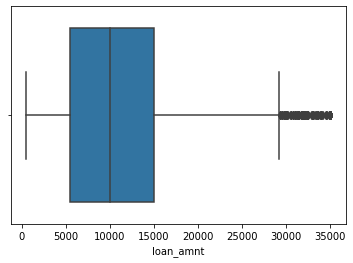





columns: funded_amnt


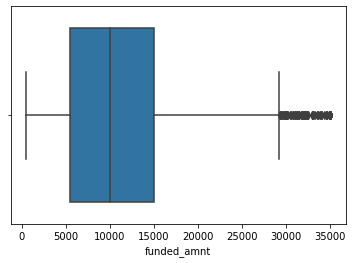





columns: funded_amnt_inv


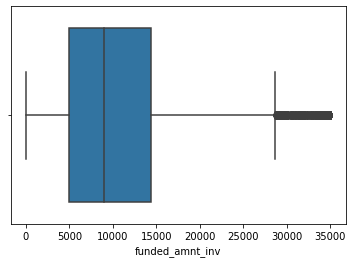





columns: term


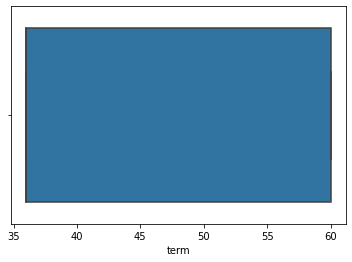





columns: int_rate


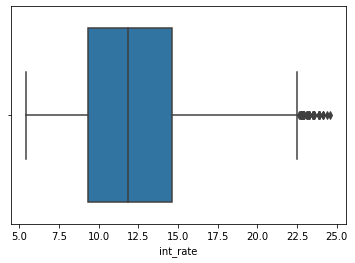





columns: installment


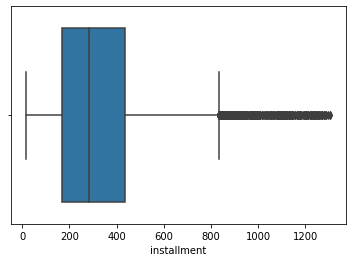





columns: emp_length


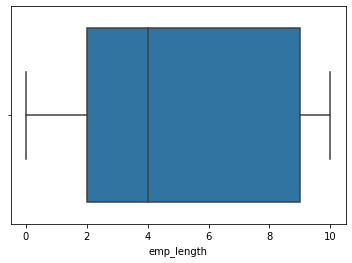





columns: annual_inc


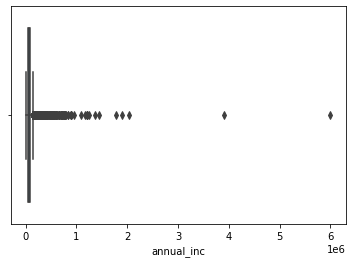





columns: dti


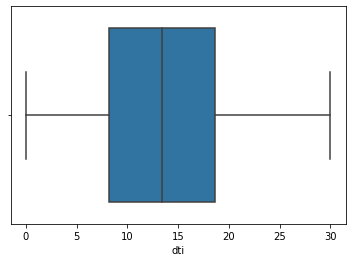





columns: delinq_2yrs


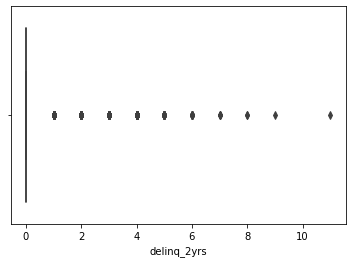





columns: inq_last_6mths


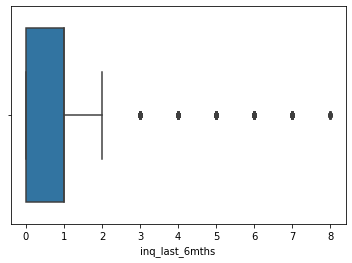





columns: open_acc


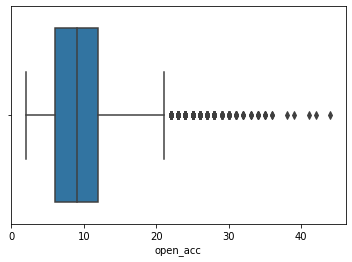





columns: pub_rec


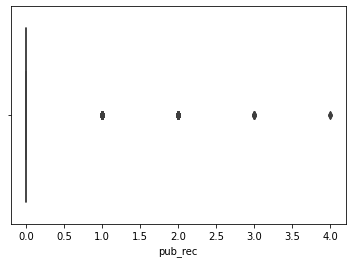





columns: revol_bal


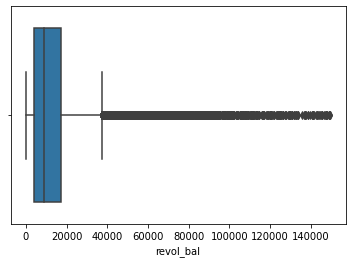





columns: revol_util


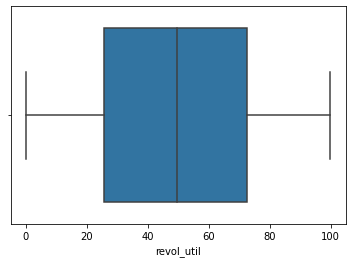





columns: total_acc


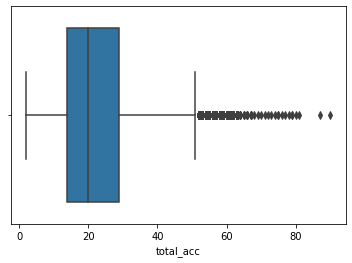





columns: issue_d_month


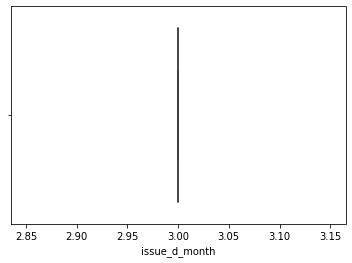





columns: issue_d_year


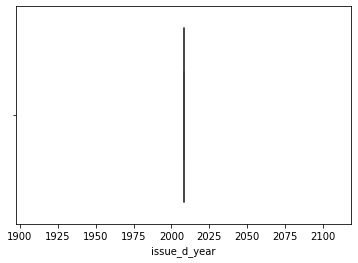

In [199]:
for i in numerical_columns.columns:
    print("columns: {}".format(i))
    sns.boxplot(x=i, data=df)
    plt.show()
    print("\n")
    print("\n")

We can see that there are oultiers in annual_inc, open_acc, total_acc and revol_bal